In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from typing import Any, List
import os
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pickle
import seaborn as sns
from collections import defaultdict
import matplotlib as mpl
from concurrent.futures import ProcessPoolExecutor

import fathon  # Assuming you have the 'fathon' library installed
import numpy as np
import pandas as pd
from fathon import fathonUtils as fu


/home/ak/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_and_save_histplot(data, bins, tick_size, xlabel, ylabel, xlabel_size, ylabel_size, filename):
    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Create the histogram with customized KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=bins, kde=True, kde_kws={'color': 'red', 'linestyle': '--', 'linewidth': 3})

    # Adjusting tick size
    plt.xticks(size=tick_size)
    plt.yticks(size=tick_size)

    # Setting x and y labels and their sizes
    plt.xlabel(xlabel, size=xlabel_size)
    plt.ylabel(ylabel, size=ylabel_size)

    # Save the plot
    plt.savefig(filename, dpi=300)

# # Example usage
# create_and_save_histplot(mpcVolMedian, bins=40, tick_size=12, xlabel='X-axis Label', ylabel='Y-axis Label', xlabel_size=14, ylabel_size=14, filename='histogram.png')


In [3]:
colormap = plt.cm.RdBu
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle.mplstyle'))

In [4]:
LaCie = '/media/ak/LaCie/InterestRateFuturesData'
rawData = os.path.join(LaCie, 'Raw Data')
mfdfa = os.path.join(LaCie, 'MFDFA')
MFDCCA = '/media/ak/LaCie/InterestRateFuturesData/MFDCCA'
rawCorrel = os.path.join(MFDCCA,'RawCorrelations' )
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'

In [5]:
symbolsDirs = os.listdir(mfdfa)
SymbolIdx = 7
print(symbolsDirs[SymbolIdx])
symbolIdxDir = os.path.join(mfdfa, 'YM1')
bars = ['tick', 'volume', 'dollar']
VolumeSymbolIdxDir = os.path.join(symbolIdxDir, bars[1])
TickSymbolIdxDir = os.path.join(symbolIdxDir, bars[0])
DollarSymbolIdxDir = os.path.join(symbolIdxDir, bars[2])
VolumeSymbolIdxDir

YM1


'/media/ak/LaCie/InterestRateFuturesData/MFDFA/YM1/volume'

 ### volume

In [7]:
files = os.listdir(VolumeSymbolIdxDir)
fileIdx = 1
mpcDictVolume = dict()
for i in range(0, len(files)):
    filePath = os.path.join(VolumeSymbolIdxDir, files[fileIdx])
    volMpc = pd.read_pickle(filePath)['volume']['micro_price_change']
    mpcDictVolume[i] = volMpc


In [ ]:
## Tick

In [8]:
files = os.listdir(TickSymbolIdxDir)
fileIdx = 1
mpcDictTick = dict()
for i in range(0, len(files)):
    filePath = os.path.join(TickSymbolIdxDir, files[fileIdx])
#     print(os.path.isfile(filePath))
    tickMPC = pd.read_pickle(filePath)['tick']['micro_price_change']
    mpcDictTick[i] = tickMPC



In [ ]:
## Dollar

In [9]:
files = os.listdir(DollarSymbolIdxDir)
fileIdx = 1
dolrDictTick = dict()
for i in range(0, len(files)):
    filePath = os.path.join(DollarSymbolIdxDir, files[fileIdx])
#     print(os.path.isfile(filePath))
    dolrMPC = pd.read_pickle(filePath)['dollar']['micro_price_change']
    dolrDictTick[i] = dolrMPC


In [10]:
mpcVolMedian = pd.DataFrame.from_dict(mpcDictVolume).median(axis=1)
mpcTickMedian = pd.DataFrame.from_dict(mpcDictTick).median(axis=1)
mpcDolrMedian = pd.DataFrame.from_dict(dolrDictTick).median(axis=1)


In [ ]:
_=plt.hist(mpcTickMedian_normalized, bins=30)
plt.show()
_=plt.hist(mpcVolMedian_normalized, bins =30)
plt.show()


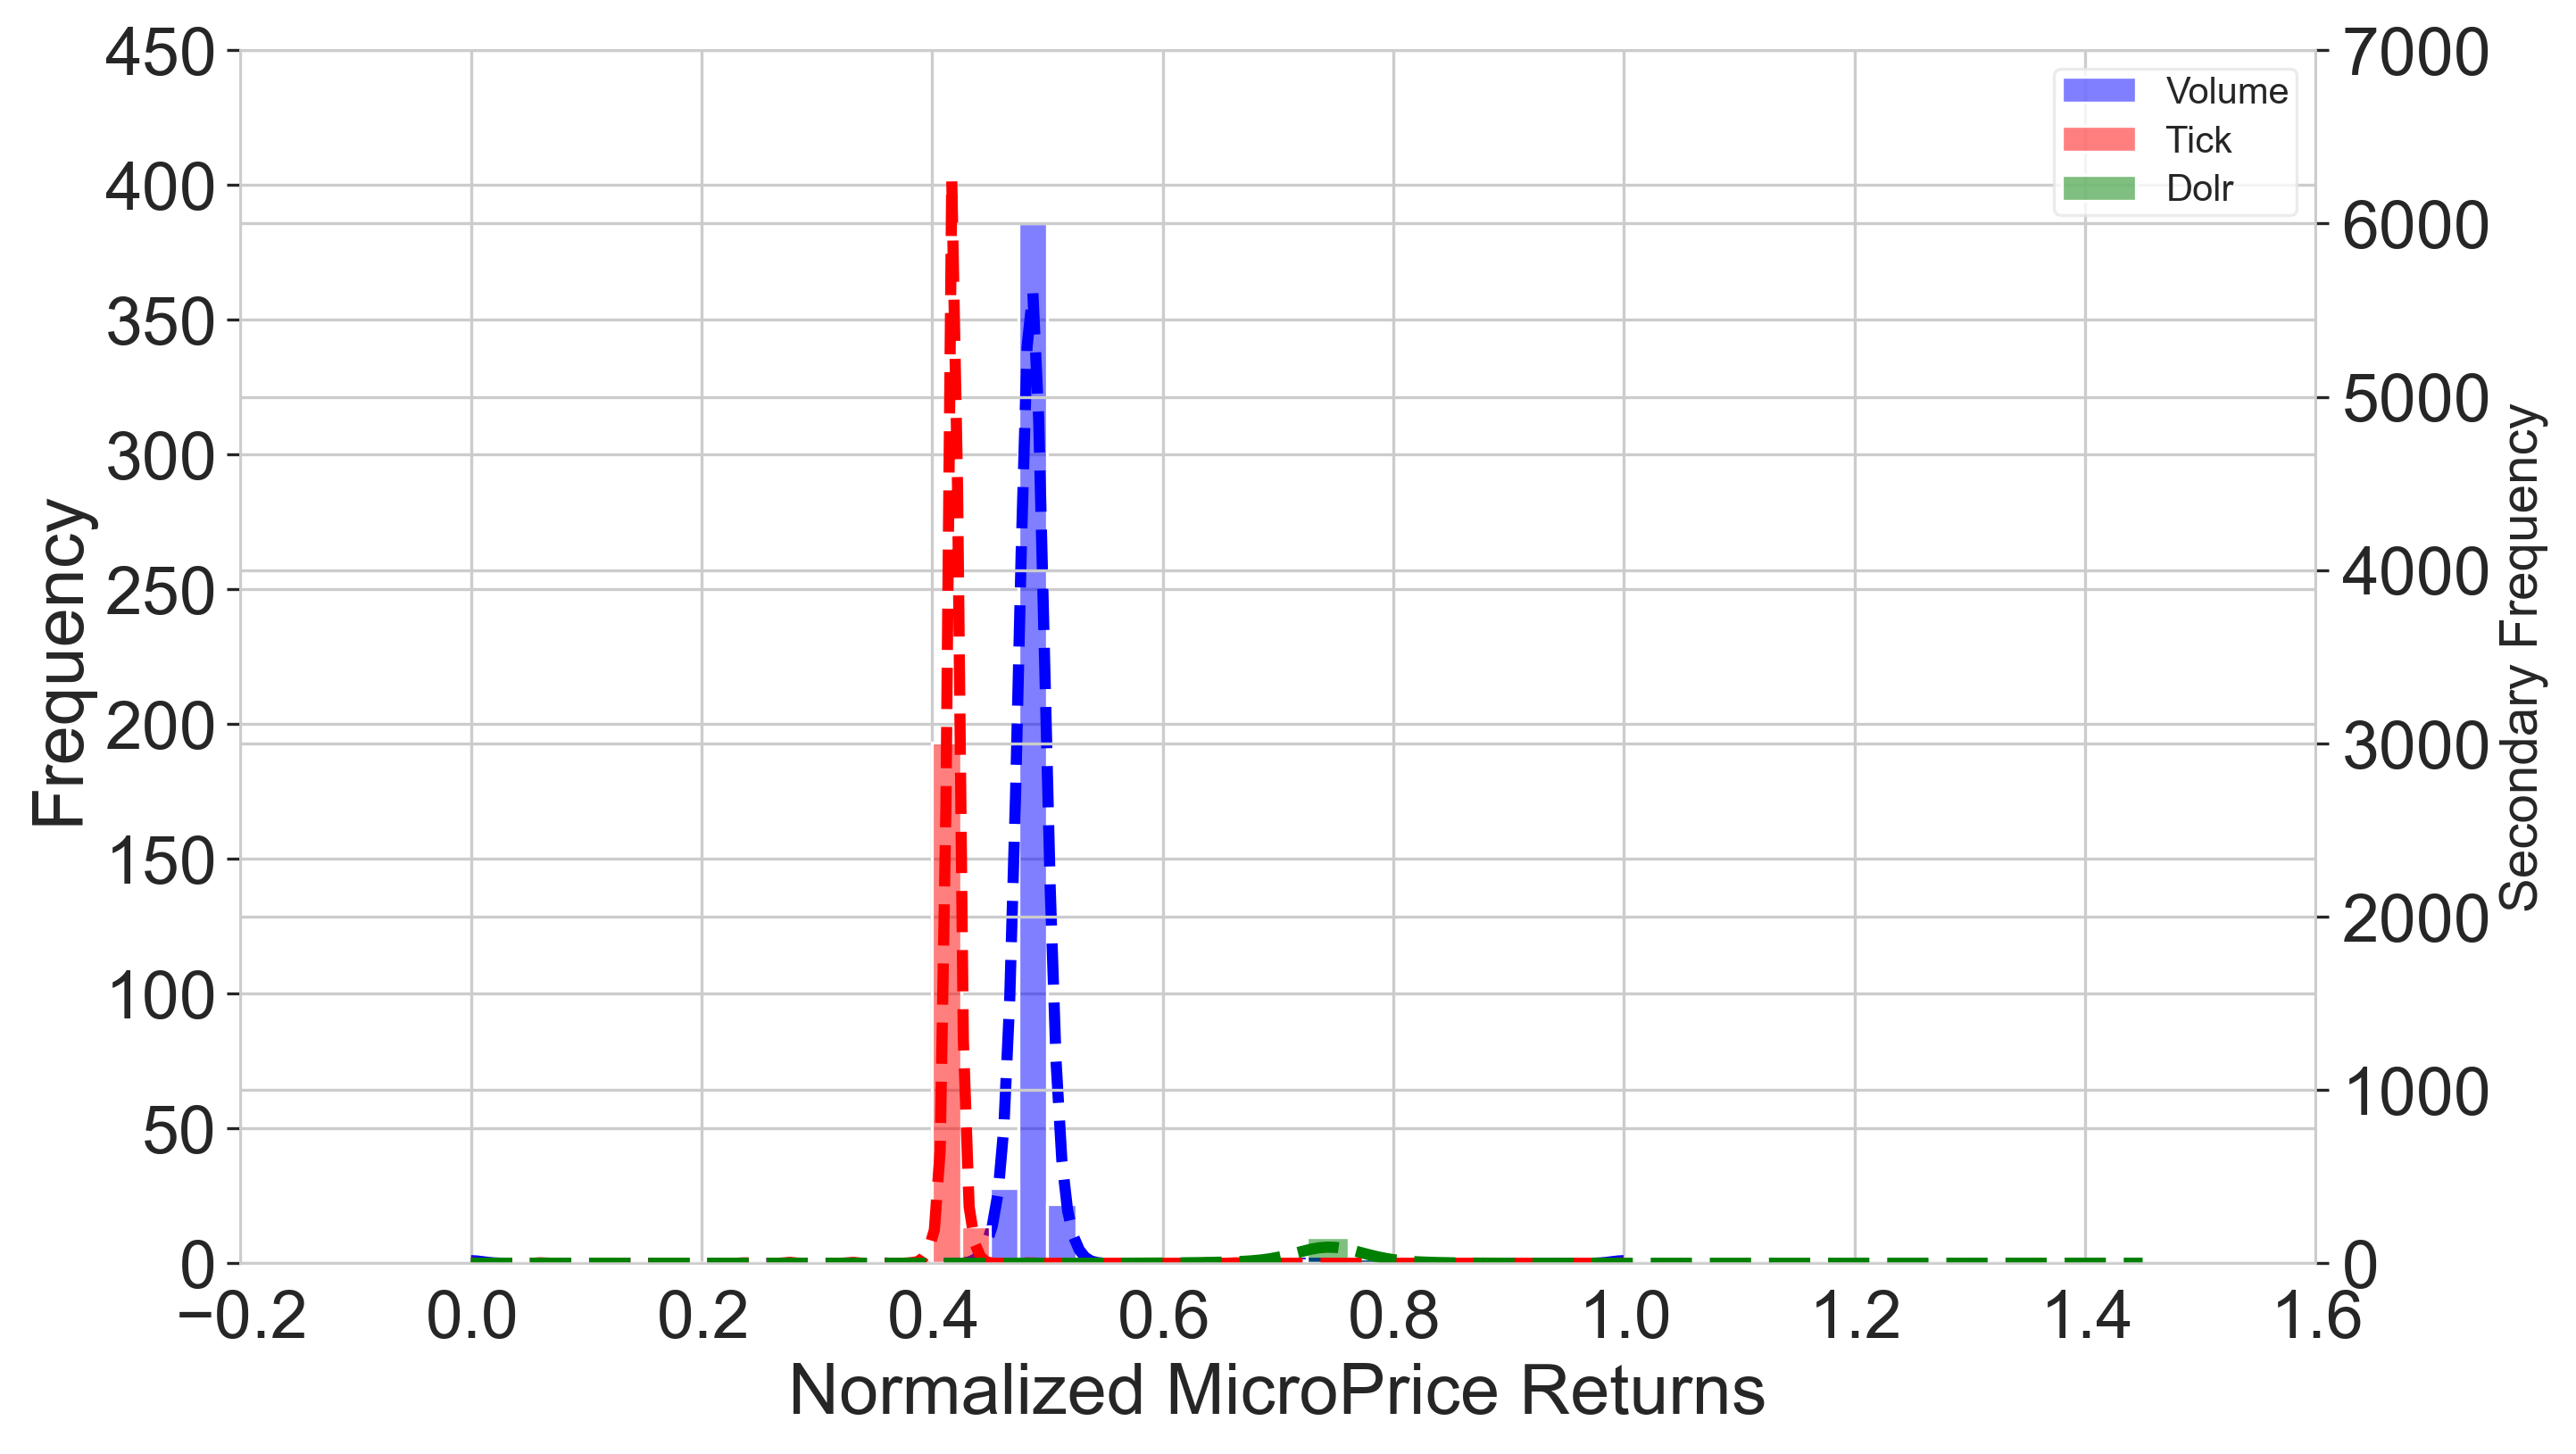

In [19]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming mpcDictVolume, mpcDictTick, and dolrDictTick are defined and valid
# mpcVolMedian = pd.DataFrame.from_dict(mpcDictVolume).median(axis=1)
# mpcTickMedian = pd.DataFrame.from_dict(mpcDictTick).median(axis=1)
# mpcDolrMedian = pd.DataFrame.from_dict(dolrDictTick).median(axis=1)

# Normalize the data
mpcVolMedian_normalized = (mpcVolMedian - mpcVolMedian.min()) / (mpcVolMedian.max() - mpcVolMedian.min())
mpcTickMedian_normalized = (mpcTickMedian - mpcTickMedian.min()) / (mpcTickMedian.max() - mpcTickMedian.min())
mpcDolrMedian_normalized = (mpcDolrMedian - mpcDolrMedian.min()) / (mpcDolrMedian.max()- mpcDolrMedian.min())*1.45

# Plotting function with secondary axis
def create_and_save_histplot_with_secondary_axis(vol_data, tick_data, dolr_data, tick_size, xlabel, ylabel, xlabel_size, ylabel_size, filename):
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.histplot(vol_data, bins=40, kde=True, color='blue', ax=ax1, line_kws={'linestyle': '--', 'linewidth': 3}, label='Volume')
    ax1.set_xlabel(xlabel, size=xlabel_size+5)
    ax1.set_ylabel(ylabel, size=ylabel_size+5)
    ax1.tick_params(axis='both', which='major', labelsize=tick_size)

    ax2 = ax1.twinx()
    sns.histplot(tick_data, bins=40, kde=True, color='red', ax=ax2, line_kws={'linestyle': '--', 'linewidth': 3}, label='Tick')
    sns.histplot(dolr_data, bins=40, kde=True, color='green', ax=ax2, line_kws={'linestyle': '--', 'linewidth': 3}, label='Dolr')
    ax2.set_ylabel('Secondary ' + ylabel, size=ylabel_size)
    ax2.tick_params(axis='y', which='major', labelsize=tick_size)
    filename = os.path.join(figuresLocation, str(symbolsDirs[SymbolIdx])+'_micropricereturns_normalised.png')

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.savefig(filename, dpi=300)

# Using the function
create_and_save_histplot_with_secondary_axis(mpcVolMedian_normalized, mpcTickMedian_normalized, mpcDolrMedian_normalized, tick_size=18, xlabel='Normalized MicroPrice Returns', ylabel='Frequency', xlabel_size=14, ylabel_size=14, filename='histogram_with_secondary_axis.png')
